# The Sparks Foundation
# Data Science and Business Analytics Intern Task

## By Ghazali Akmal Rabbani
## Task 1

# Problem and Purpose

1. Predict the percentage of an student based on the no. of study hours
2. This is a simple linear regression task as it involves just 2 variables
3. You can use R, Python, SAS Enterprise Miner or any other tool
4. Data can be found at http://bit.ly/w-data
5. What will be predicted score if a student studies for 9.25 hours/day ?

# Import Library and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Checking Outliers

In [5]:
data_col_numeric = df.select_dtypes(include=['int64']).columns.tolist()
data_col_numeric

['Scores']

In [6]:
data_col_float = df.select_dtypes(include=['float64']).columns.tolist()
data_col_float

['Hours']

## Create Boxplot Function to check the outliers

In [7]:
def boxplot_numerical(numerical):
    plt.figure(figsize = (10, 6))
    sns.boxplot(df[numerical]).set_title(numerical)
    median = df[numerical].median()
    FirstQuartile = df[numerical].quantile(0.25)
    ThirdQuartile = df[numerical].quantile(0.75)
    Interquartile = scipy.stats.iqr(df[numerical])
    UpperFence = ThirdQuartile + (1.5*Interquartile)
    LowerFence = FirstQuartile - (1.5*Interquartile)

    print ('==================================')
    print ('Statistical Data Summary')
    print ('==================================')
    print ('Median : ', median)
    print ('1st Quartile : ', FirstQuartile)
    print ('3rd Quartile : ', ThirdQuartile)
    print ('IQR : ', Interquartile)
    print ('Upper Fence : ', UpperFence)
    print ('Lower Fence : ', LowerFence)
    print ('==================================')

    UpperOutliers = []
    LowerOutliers = []
    StatusUpperOutliers = False
    StatusLowerOutliers = False
    for x in df[numerical]:
      if (x > UpperFence):
        UpperOutliers.append(x)
        StatusUpperOutliers = True
      elif (x < LowerFence):
        LowerOutliers.append(x)
        StatusLowerOutliers = True
    print ()
    print ('==================================')
    print ('Outliers Data Detection')
    print ('==================================')
    print ('Upper Outliers Data : ', sorted(UpperOutliers, reverse=False))
    print ('Upper Outliers Status : ', StatusUpperOutliers)
    print ('Lower Outliers Data : ', sorted(LowerOutliers, reverse=False))
    print ('Lower Outliers Status : ', StatusLowerOutliers)

    plt.figure(figsize = (10, 6))
    sns.boxplot(df[numerical], showfliers = False).set_title(numerical + ' No Outliers')

Statistical Data Summary
Median :  47.0
1st Quartile :  30.0
3rd Quartile :  75.0
IQR :  45.0
Upper Fence :  142.5
Lower Fence :  -37.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


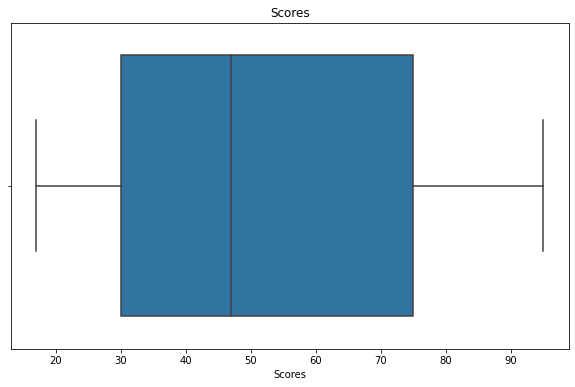

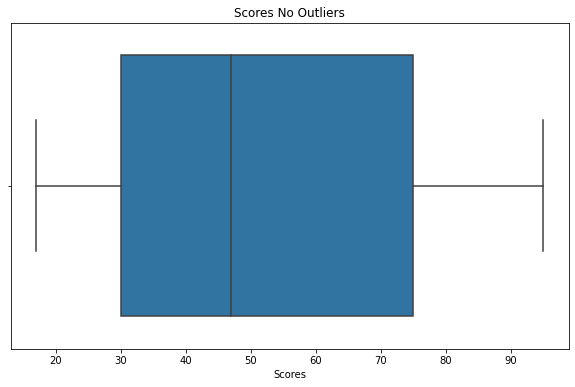

In [8]:
boxplot_numerical(data_col_numeric[0])

Statistical Data Summary
Median :  4.8
1st Quartile :  2.7
3rd Quartile :  7.4
IQR :  4.7
Upper Fence :  14.450000000000001
Lower Fence :  -4.3500000000000005

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


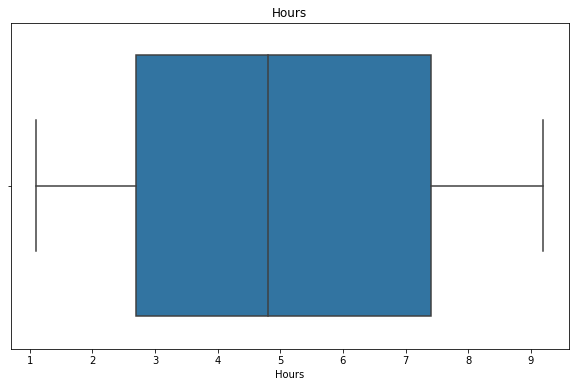

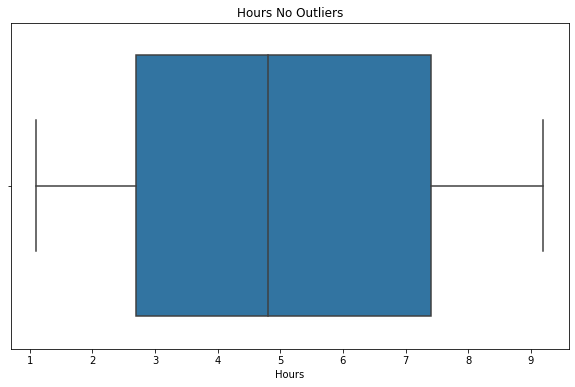

In [9]:
boxplot_numerical(data_col_float[0])

**There is no Outliers in Hours and Scores data column**

# Check the Linearity

Check if the dependent features have a linear relationship with the target (Scores)

In [10]:
df.corr().Scores

Hours     0.976191
Scores    1.000000
Name: Scores, dtype: float64

**Hours feature in the dataset has highly positive correlated linearity to the target (Scores)**

# Normality

It is a prerequisite of Linear Regression that the features be normal in nature (Gaussian Distribution).

Ideal normality is very scarce in real data but we can do if the skewness and kurtosis of the data is within the range of -1 to +1

In [11]:
from scipy import stats

In [12]:
print('Skewness of Hours is ', stats.skew(df.Hours))
print('Kurtosis of Hours is ', stats.kurtosis(df.Hours))

Skewness of Hours is  0.1787220638918746
Kurtosis of Hours is  -1.2868356406445227


# Plotting the distribution of Scores

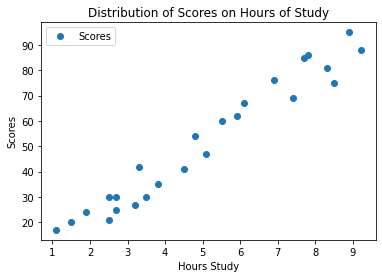

In [13]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Distribution of Scores on Hours of Study')
plt.xlabel('Hours Study')
plt.ylabel('Scores')
plt.show()

# Separate out PREDICTOR/FEATURE and TARGET/LABEL

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, 1]

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [16]:
X_train.shape

(20, 1)

In [17]:
X_test.shape

(5, 1)

# Train Model

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## Plot the Regression Line

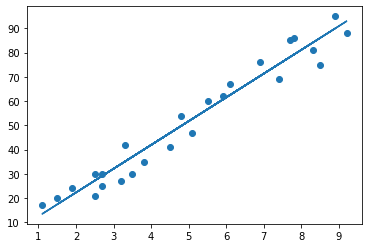

In [19]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Predict the Data

In [20]:
y_pred = model.predict(X_test)

## Comparison of Actual vs Predicted Data

In [21]:
dfCompared = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
dfCompared

,Actual,Predicted
5,20,17.371423
1,47,52.702923
13,42,35.037173
2,27,34.055743
12,41,46.814340


## Predict if a Student has 9.25 Hours of Study 

In [22]:
hours = 9.25
hours = np.array(hours).reshape(-1,1)
StudentPredictedScore = model.predict(hours)

print('No of Hours = {}'.format(hours[0]))
print('Predicted Score = {}'.format(StudentPredictedScore[0]))

No of Hours = [9.25]
Predicted Score = 93.43229053722452


# Evaluate the Model

In [23]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

Mean Absolute Error:  5.632881746692995
R2 Score:  0.6683995499740194
